In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:

df3=pd.read_excel('/Users/user/Desktop/tamrine2.xlsx')
df3.groupby(['customer name'])['final cost'].sum().sort_values(ascending=False)
data=pd.DataFrame(df3.groupby(['customer name'])['final cost'].sum().sort_values(ascending=False))
data
df3.groupby(['customer name'])['address']
data1=pd.DataFrame(df3.groupby(['customer name'])['address'],columns=['customer name','address'])
data1
res=pd.merge(data,data1,on='customer name')

,customer name,final cost,address
0,حمیدرضا تبریزیان,290501028.0,29 ملک شهر خیابان مفتح کوچه طلوع (شماره 50...
1,علی آخوندی,193184177.0,0 خیابان امام خمینی.جنب بانک ملی 1 خ...
2,سید رضا حسینی,147551960.0,173 خ امام خمینی خ امیر کبیر روبروی بانک م...
3,محسن سلیمانی,108988792.0,76 خیابان کاشانی جنوبی 30 متر بعد از خیابا...
4,اتوسرویس ترافیک,89339103.0,26 خ سعدی شمالی.خ خواجه عبدالله انصاری.جنب ...
5,پویا هدایتی,80282170.0,169 کمربندی چرمهین زمان آباد نبش کوچه ی صفا...
6,حسین عبدالرضایی,75885037.0,24 اصفهان خ ابتدای اتوبان ذوب اهن ابتدای ب...
7,عباس بروجی,66337160.0,20 خیابان سجاد انتهای سپهسالار یا قائم مقا...
8,محمد بیگی,64855518.0,201 ابتدای اتوبان ذوب اهن-بعداز قائمیه. بعد...
9,فرهاد ثالثی,47780720.0,136 بلوارکشاورزخیابان قائمیه .صد متر بعدازچ...


In [13]:
def newout(X):
    if X<=10000000:
        X=0
    elif 10000000<X<60000000:
        X=1
    else:
        X=2
    return X

In [20]:
res['output']=res['final cost'].apply(newout)

In [23]:
res

,customer name,final cost,address,output
0,حمیدرضا تبریزیان,290501028.0,29 ملک شهر خیابان مفتح کوچه طلوع (شماره 50...,2
1,علی آخوندی,193184177.0,0 خیابان امام خمینی.جنب بانک ملی 1 خ...,2
2,سید رضا حسینی,147551960.0,173 خ امام خمینی خ امیر کبیر روبروی بانک م...,2
3,محسن سلیمانی,108988792.0,76 خیابان کاشانی جنوبی 30 متر بعد از خیابا...,2
4,اتوسرویس ترافیک,89339103.0,26 خ سعدی شمالی.خ خواجه عبدالله انصاری.جنب ...,2
5,پویا هدایتی,80282170.0,169 کمربندی چرمهین زمان آباد نبش کوچه ی صفا...,2
6,حسین عبدالرضایی,75885037.0,24 اصفهان خ ابتدای اتوبان ذوب اهن ابتدای ب...,2
7,عباس بروجی,66337160.0,20 خیابان سجاد انتهای سپهسالار یا قائم مقا...,2
8,محمد بیگی,64855518.0,201 ابتدای اتوبان ذوب اهن-بعداز قائمیه. بعد...,2
9,فرهاد ثالثی,47780720.0,136 بلوارکشاورزخیابان قائمیه .صد متر بعدازچ...,1


In [24]:
res.to_excel('/Users/user/Desktop/clf.xlsx', engine='xlsxwriter')

In [28]:
profit_df=pd.read_excel('/Users/user/Desktop/clf.xlsx')

,Unnamed: 0,customer name,final cost,address,output
0,0,حمیدرضا تبریزیان,290501028,29 ملک شهر خیابان مفتح کوچه طلوع (شماره 50...,2
1,1,علی آخوندی,193184177,0 خیابان امام خمینی.جنب بانک ملی\n1 ...,2
2,2,سید رضا حسینی,147551960,173 خ امام خمینی خ امیر کبیر روبروی بانک م...,2
3,3,محسن سلیمانی,108988792,76 خیابان کاشانی جنوبی 30 متر بعد از خیابا...,2
4,4,اتوسرویس ترافیک,89339103,26 خ سعدی شمالی.خ خواجه عبدالله انصاری.جنب ...,2
5,5,پویا هدایتی,80282170,169 کمربندی چرمهین زمان آباد نبش کوچه ی صفا...,2
6,6,حسین عبدالرضایی,75885037,24 اصفهان خ ابتدای اتوبان ذوب اهن ابتدای ب...,2
7,7,عباس بروجی,66337160,20 خیابان سجاد انتهای سپهسالار یا قائم مقا...,2
8,8,محمد بیگی,64855518,201 ابتدای اتوبان ذوب اهن-بعداز قائمیه. بعد...,2
9,9,فرهاد ثالثی,47780720,136 بلوارکشاورزخیابان قائمیه .صد متر بعدازچ...,1


In [30]:
X=profit_df[['final cost']]

In [31]:
X=np.array(X).reshape(-1,1)

In [33]:
X.shape

(23, 1)

In [35]:
Y=np.array(profit_df[['output']]).reshape(-1,1)

In [37]:
Y.shape

(23, 1)

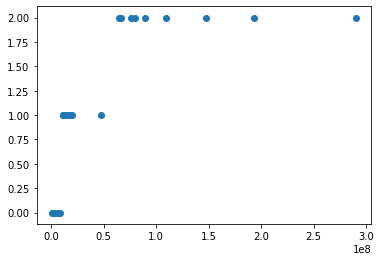

In [38]:
plt.scatter(X,Y)

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=1)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
clf=KNeighborsClassifier()

In [84]:
model=clf.fit(X_train,Y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [85]:
y_pred=model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(Y_test,y_pred)

array([[2, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

In [92]:
print(accuracy_score(Y_test,y_pred))


0.8


In [99]:
clf2=LogisticRegression()

In [100]:
model2=clf2.fit(X_train,Y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [101]:
y_pred2=clf2.predict(X_test)

In [102]:
confusion_matrix(Y_test,y_pred2)

array([[0, 0, 3],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

In [103]:
print(accuracy_score(Y_test,y_pred2))

0.2


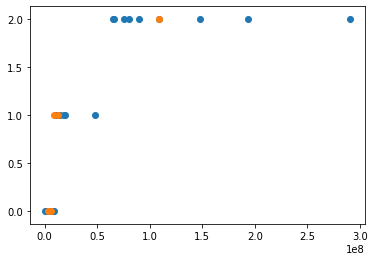

In [107]:
plt.scatter(X,Y)
plt.scatter(X_test,y_pred)
#plt.scatter(X_test,y_pred2)

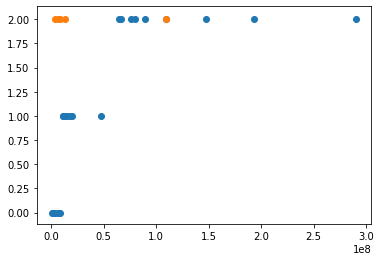

In [108]:
plt.scatter(X,Y)
plt.scatter(X_test,y_pred2)

In [170]:
df=pd.read_csv('/Users/user/Desktop/Machine Learning/AutoService-2019-08-14.csv')

In [205]:
x=df[['number_of_shelves','number_of_pits','number_of_employees','number_of_assistants','garage_aria','store_aria']]

In [206]:
def appearance(X):
    if X=='E':
        return 2
    elif X=='G':
        return 1
    else:
        return 0
        

In [207]:
df['app']=df['appearance'].apply(appearance)

In [208]:
df.to_csv('/Users/user/Desktop/clf2.csv')

In [209]:
y=df[['app']]

In [211]:
x=np.array(x)

In [199]:
y=np.array(y)

In [200]:
y.shape

(838, 1)

In [212]:
x.shape

(838, 6)

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [217]:
clf4=KNeighborsClassifier()

In [218]:
model4=clf4.fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [219]:
y_predict=model4.predict(x_test)

In [220]:
print(accuracy_score(y_test,y_predict))

0.8611111111111112


In [231]:
x2=[[1,  3, 2,  2, 20, 20]]

In [232]:
y_predict=model4.predict(x2)

In [233]:
y_predict

array([2], dtype=int64)